# Car Price Prediction for Car Dehko

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Attributes in the dataset


name<br> 
year<br> 
km_driven<br> 
fuel<br> 
seller_type<br> 
transmission<br> 
owner<br> 
mileage<br> 
engine<br> 
max_power<br> 
torque<br> 
seats<br> 
selling_price

In [2]:
df=pd.read_csv(r"C:\Users\kiran\Desktop\cardehko\train\Car details v3.csv")

In [3]:
df.head(10)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,130000
5,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,440000
6,Maruti Wagon R LXI DUO BSIII,2007,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,96000
7,Maruti 800 DX BSII,2001,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,45000
8,Toyota Etios VXD,2011,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,350000
9,Ford Figo Diesel Celebration Edition,2013,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,200000


In [4]:
df.shape

(8128, 13)

## Feature engineering

In [5]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows:",duplicate_rows_df.shape)

Number of duplicate rows: (1202, 13)


In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(6926, 13)

In [8]:
df.describe()

,year,km_driven,seats,selling_price
count,6926.000000,6.926000e+03,6718.000000,6.926000e+03
mean,2013.420300,7.399568e+04,5.434653,5.172707e+05
std,4.078286,5.835810e+04,0.984230,5.197670e+05
min,1983.000000,1.000000e+00,2.000000,2.999900e+04
25%,2011.000000,4.000000e+04,5.000000,2.500000e+05
50%,2014.000000,7.000000e+04,5.000000,4.000000e+05
75%,2017.000000,1.000000e+05,5.000000,6.335000e+05
max,2020.000000,2.360457e+06,14.000000,1.000000e+07


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   km_driven      6926 non-null   int64  
 3   fuel           6926 non-null   object 
 4   seller_type    6926 non-null   object 
 5   transmission   6926 non-null   object 
 6   owner          6926 non-null   object 
 7   mileage        6718 non-null   object 
 8   engine         6718 non-null   object 
 9   max_power      6721 non-null   object 
 10  torque         6717 non-null   object 
 11  seats          6718 non-null   float64
 12  selling_price  6926 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 757.5+ KB


In [10]:
df.isnull().sum()

name               0
year               0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
selling_price      0
dtype: int64

In [11]:
 df[pd.isnull(df).any(axis=1)].head(20)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
13,Maruti Swift 1.3 VXi,2007,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,200000
31,Fiat Palio 1.2 ELX,2003,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,70000
78,Tata Indica DLS,2003,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,50000
87,Maruti Swift VDI BSIV W ABS,2015,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,475000
119,Maruti Swift VDI BSIV,2010,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,300000
138,BMW X1 sDrive 20D xLine,2017,27000,Diesel,Dealer,Automatic,First Owner,NaN,NaN,NaN,NaN,NaN,2150000
200,Toyota Etios GD,2012,120000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,235000
206,Maruti Omni E 8 Str STD,2003,90000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,40000
228,Maruti Swift 1.3 VXi,2008,120000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,130000
252,Tata Indica DLS,2005,110000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,75000


In [12]:
df=df.dropna()


In [13]:
df['engine'] = df['engine'].str.replace(r'[^\d.]', '')
df['mileage'] = df['mileage'].str.replace(r'[^\d.]', '')
df['max_power'] = df['max_power'].str.replace(r'[^\d.]', '')


C:\Users\kiran\AppData\Local\Temp/ipykernel_9736/1392188654.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['engine'] = df['engine'].str.replace(r'[^\d.]', '')
C:\Users\kiran\AppData\Local\Temp/ipykernel_9736/1392188654.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['mileage'] = df['mileage'].str.replace(r'[^\d.]', '')
C:\Users\kiran\AppData\Local\Temp/ipykernel_9736/1392188654.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['max_power'] = df['max_power'].str.replace(r'[^\d.]', '')


In [14]:
df=df.reset_index(drop=True)

In [15]:
df

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.9,998,67.1,90Nm@ 3500rpm,5.0,260000
6713,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,219.7Nm@ 1500-2750rpm,5.0,475000
6714,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,113.7Nm@ 4000rpm,5.0,320000
6715,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,"24@ 1,900-2,750(kgm@ rpm)",5.0,135000


In [16]:
df.torque.str.contains(r'KGM|kgm').sum()

481

In [17]:
kgm=df.torque.str.contains(r'KGM|kgm')

In [18]:
df.torque.str.contains(r'Nm|nm|NM').sum()

6227

In [19]:
df['torque'] = df['torque'].str.replace(r'[A-Za-z]', '')

C:\Users\kiran\AppData\Local\Temp/ipykernel_9736/1987694210.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['torque'] = df['torque'].str.replace(r'[A-Za-z]', '')


In [20]:
df['torque'], df['rpm'] = df['torque'].str.split('@', 1).str

C:\Users\kiran\AppData\Local\Temp/ipykernel_9736/2557462184.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['torque'], df['rpm'] = df['torque'].str.split('@', 1).str


In [21]:
df['torque'], df['rpm'] = df['torque'].str.split(' ', 1).str

C:\Users\kiran\AppData\Local\Temp/ipykernel_9736/1013151603.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['torque'], df['rpm'] = df['torque'].str.split(' ', 1).str


In [22]:
df

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price,rpm
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190,5.0,450000,NaN
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250,5.0,370000,NaN
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,12.7,5.0,158000,NaN
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4,5.0,225000,1750-2750
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,11.5,5.0,130000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.9,998,67.1,90,5.0,260000,NaN
6713,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,219.7,5.0,475000,NaN
6714,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,113.7,5.0,320000,NaN
6715,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,24,5.0,135000,NaN


In [23]:
df['torque'] = df['torque'].str.replace(r'[^\d.]', '')

C:\Users\kiran\AppData\Local\Temp/ipykernel_9736/727400315.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['torque'] = df['torque'].str.replace(r'[^\d.]', '')


In [24]:
df['torque'] = pd.to_numeric(df['torque'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   km_driven      6717 non-null   int64  
 3   fuel           6717 non-null   object 
 4   seller_type    6717 non-null   object 
 5   transmission   6717 non-null   object 
 6   owner          6717 non-null   object 
 7   mileage        6717 non-null   object 
 8   engine         6717 non-null   object 
 9   max_power      6717 non-null   object 
 10  torque         6717 non-null   float64
 11  seats          6717 non-null   float64
 12  selling_price  6717 non-null   int64  
 13  rpm            220 non-null    object 
dtypes: float64(2), int64(3), object(9)
memory usage: 734.8+ KB


In [26]:
df.at[kgm,'torque']=df['torque']*9.80665

In [27]:
#1 kilogram meter = 9.80665 newton meter.

In [28]:
df

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price,rpm
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190.000000,5.0,450000,NaN
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5.0,370000,NaN
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,124.544455,5.0,158000,NaN
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,219.668960,5.0,225000,1750-2750
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,112.776475,5.0,130000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.9,998,67.1,90.000000,5.0,260000,NaN
6713,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,219.700000,5.0,475000,NaN
6714,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,113.700000,5.0,320000,NaN
6715,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,235.359600,5.0,135000,NaN


In [29]:
df.drop(columns=['rpm'],inplace=True)

In [30]:
df[["mileage", "engine","max_power"]] = df[["mileage", "engine","max_power"]].apply(pd.to_numeric)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   km_driven      6717 non-null   int64  
 3   fuel           6717 non-null   object 
 4   seller_type    6717 non-null   object 
 5   transmission   6717 non-null   object 
 6   owner          6717 non-null   object 
 7   mileage        6717 non-null   float64
 8   engine         6717 non-null   int64  
 9   max_power      6717 non-null   float64
 10  torque         6717 non-null   float64
 11  seats          6717 non-null   float64
 12  selling_price  6717 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 682.3+ KB


In [32]:
#We have used lambda function to split the column 'name' into 'ComapnyName'
CompanyName = df['name'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)

df.head()

,name,year,km_driven,CompanyName,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Maruti,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Skoda,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,Honda,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,124.544455,5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Hyundai,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,Maruti,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5.0,130000


In [33]:
category=['CompanyName','fuel','seller_type','transmission','owner']

In [34]:
df[["CompanyName","fuel","seller_type","transmission","owner"]] = df[["CompanyName","fuel","seller_type","transmission","owner"]].astype('category')

In [35]:
df.describe()

,year,km_driven,mileage,engine,max_power,torque,seats,selling_price
count,6717.000000,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6.717000e+03
mean,2013.611136,7.339834e+04,19.466585,1430.985857,87.766100,231.786478,5.434271,5.263860e+05
std,3.897402,5.870328e+04,4.048102,493.469198,31.724555,4552.567287,0.983805,5.235504e+05
min,1994.000000,1.000000e+00,0.000000,624.000000,32.800000,47.071920,2.000000,2.999900e+04
25%,2011.000000,3.800000e+04,16.800000,1197.000000,67.100000,110.000000,5.000000,2.500000e+05
50%,2014.000000,6.820300e+04,19.440000,1248.000000,81.830000,160.000000,5.000000,4.200000e+05
75%,2017.000000,1.000000e+05,22.500000,1498.000000,100.000000,200.055660,5.000000,6.500000e+05
max,2020.000000,2.360457e+06,42.000000,3604.000000,400.000000,373032.217355,14.000000,1.000000e+07


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           6717 non-null   object  
 1   year           6717 non-null   int64   
 2   km_driven      6717 non-null   int64   
 3   CompanyName    6717 non-null   category
 4   fuel           6717 non-null   category
 5   seller_type    6717 non-null   category
 6   transmission   6717 non-null   category
 7   owner          6717 non-null   category
 8   mileage        6717 non-null   float64 
 9   engine         6717 non-null   int64   
 10  max_power      6717 non-null   float64 
 11  torque         6717 non-null   float64 
 12  seats          6717 non-null   float64 
 13  selling_price  6717 non-null   int64   
dtypes: category(5), float64(4), int64(4), object(1)
memory usage: 507.2+ KB


In [37]:
for column in df[category]:
    print(df[column].value_counts())

Maruti           2089
Hyundai          1214
Mahindra          709
Tata              633
Honda             361
Ford              353
Toyota            324
Chevrolet         216
Renault           206
Volkswagen        173
Nissan             73
Skoda              69
Datsun             57
Mercedes-Benz      46
BMW                45
Fiat               39
Audi               33
Jeep               22
Mitsubishi         11
Volvo               9
Jaguar              8
Ambassador          4
Isuzu               4
Force               4
MG                  3
Land                3
Daewoo              3
Kia                 3
Lexus               1
Opel                1
Ashok               1
Name: CompanyName, dtype: int64
Diesel    3658
Petrol    2973
CNG         51
LPG         35
Name: fuel, dtype: int64
Individual          6024
Dealer               666
Trustmark Dealer      27
Name: seller_type, dtype: int64
Manual       6142
Automatic     575
Name: transmission, dtype: int64
First Owner             4

<Figure size 2160x720 with 0 Axes>

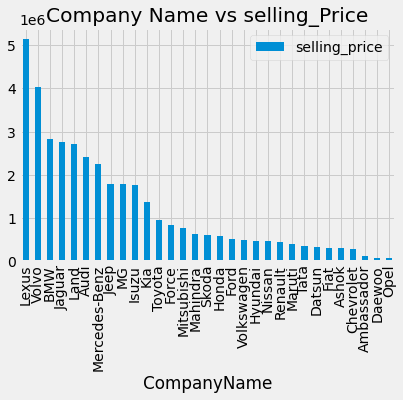

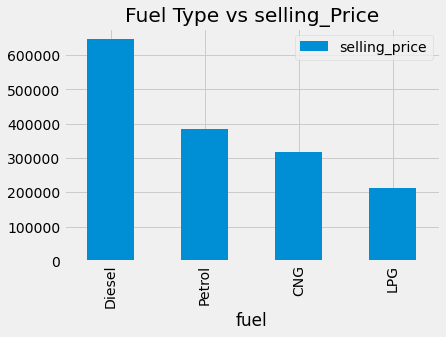

In [38]:
plt.style.use("fivethirtyeight")

plt.figure(figsize=(30, 10))

cat = pd.DataFrame(df.groupby(['CompanyName'])['selling_price'].mean().sort_values(ascending = False))
cat.plot.bar()
plt.title('Company Name vs selling_Price')
plt.show()

cat = pd.DataFrame(df.groupby(['fuel'])['selling_price'].mean().sort_values(ascending = False))
cat.plot.bar()
plt.title('Fuel Type vs selling_Price')
plt.show()



<Figure size 2160x720 with 0 Axes>

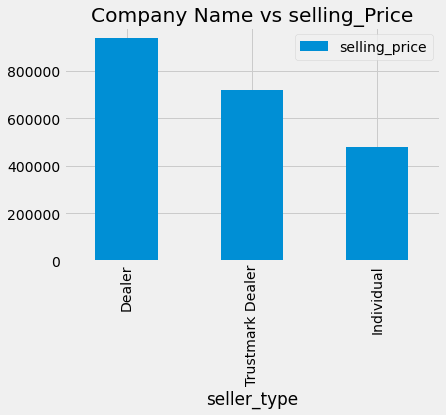

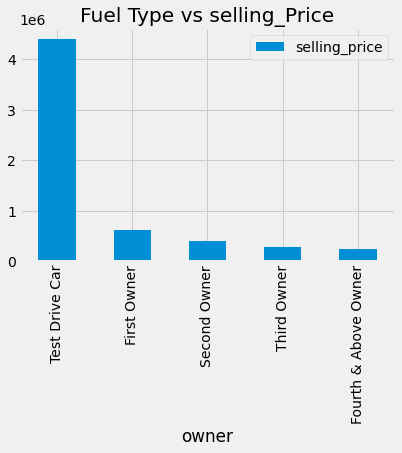

<Figure size 2160x720 with 0 Axes>

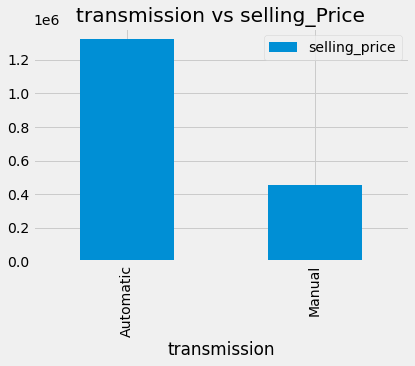

In [39]:

plt.figure(figsize=(30, 10))

cat = pd.DataFrame(df.groupby(['seller_type'])['selling_price'].mean().sort_values(ascending = False))
cat.plot.bar()
plt.title('Company Name vs selling_Price')
plt.show()

cat = pd.DataFrame(df.groupby(['owner'])['selling_price'].mean().sort_values(ascending = False))
cat.plot.bar()
plt.title('Fuel Type vs selling_Price')
plt.show()

plt.style.use("fivethirtyeight")

plt.figure(figsize=(30, 10))

cat = pd.DataFrame(df.groupby(['transmission'])['selling_price'].mean().sort_values(ascending = False))
cat.plot.bar()
plt.title('transmission vs selling_Price')
plt.show()




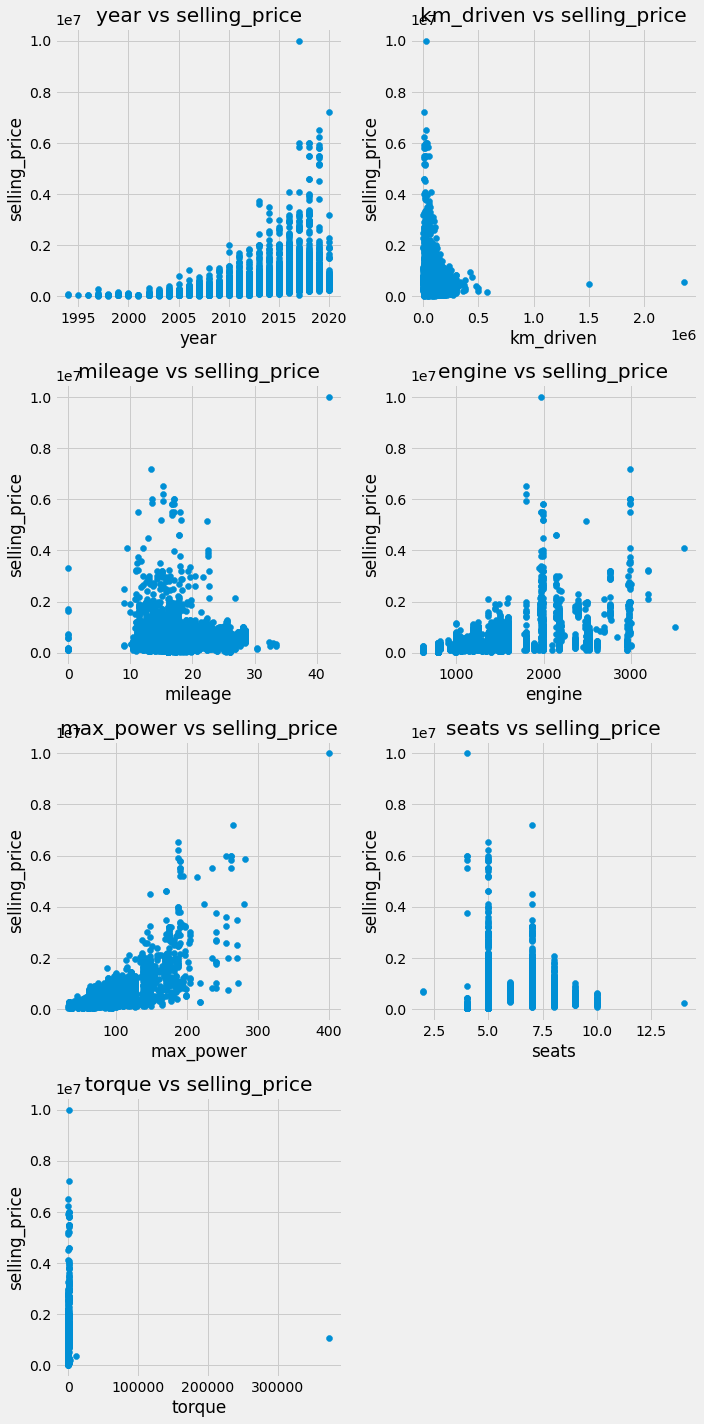

In [40]:
def scatter(x,fig):
    plt.subplot(4,2,fig)
    plt.scatter(df[x],df['selling_price'])
    plt.title(x+' vs selling_price')
    plt.ylabel('selling_price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('year', 1)
scatter('km_driven', 2)
scatter('mileage',3)
scatter('engine',4)
scatter('max_power',5)
scatter('seats',6)
scatter('torque',7)




plt.tight_layout()

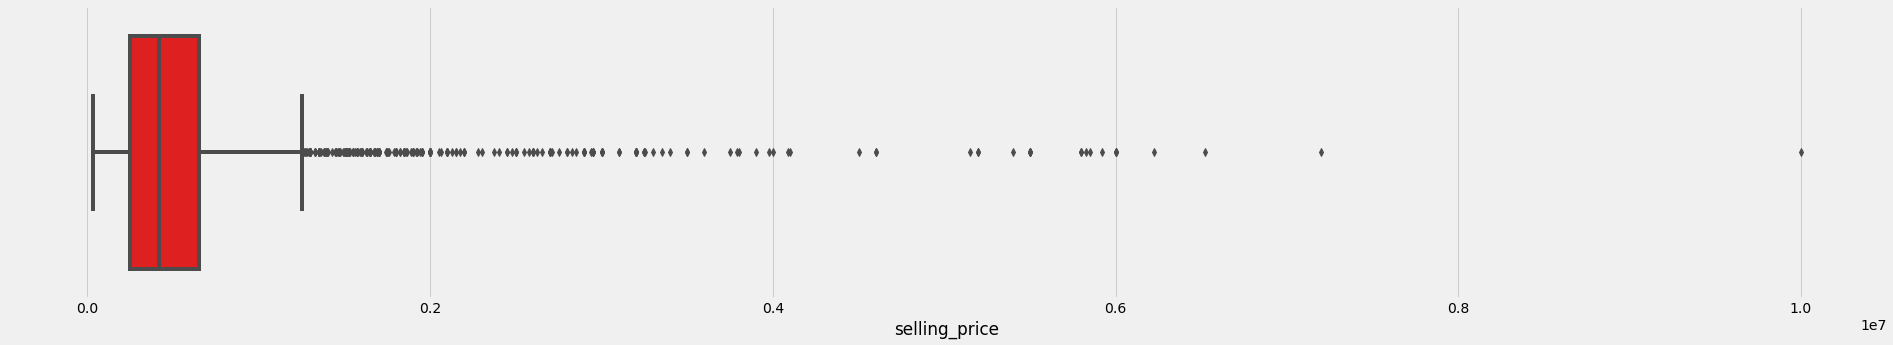

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,5))
sns.boxplot(x='selling_price',color='red', data=df)
plt.show()

In [42]:
q1 = df['selling_price'].quantile(0.25)
q2 = df['selling_price'].quantile(0.5)
q3 = df['selling_price'].quantile(0.75)
print(q1,q2,q3)

250000.0 420000.0 650000.0


In [43]:
out_less=(df['selling_price']<q1).value_counts()
out_great=(df['selling_price']>q3).value_counts()
print(out_less,out_great)

False    5135
True     1582
Name: selling_price, dtype: int64 False    5170
True     1547
Name: selling_price, dtype: int64


In [44]:
irq = q3 - q1
v_col = df['selling_price'][(df['selling_price'] <= q1 - 1.5 * irq) | (df['selling_price']>= q3 + 1.5 * irq)]
perc = np.shape(v_col)[0] * 100.0 / np.shape(df['selling_price'])[0]
print(perc)

4.7491439630787555


In [45]:
(df['selling_price'] <= q1 - 1.5 * irq) .value_counts()

False    6717
Name: selling_price, dtype: int64

In [46]:
(df['selling_price']>= q3 + 1.5 * irq).value_counts()

False    6398
True      319
Name: selling_price, dtype: int64

In [47]:
out=(df['selling_price']>= q3 + 1.5 * irq)

In [48]:
df[out]

,name,year,km_driven,CompanyName,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
39,Jeep Compass 1.4 Limited Plus BSIV,2019,5000,Jeep,Petrol,Individual,Automatic,First Owner,16.00,1368,160.77,250.0,5.0,2100000
45,Toyota Fortuner 4x4 MT,2014,77000,Toyota,Diesel,Dealer,Manual,First Owner,12.55,2982,168.50,343.0,7.0,1500000
47,Mercedes-Benz B Class B180,2014,27800,Mercedes-Benz,Diesel,Dealer,Automatic,Second Owner,14.80,2143,120.70,200.0,5.0,1450000
53,Toyota Innova Crysta 2.8 ZX AT BSIV,2016,127700,Toyota,Diesel,Dealer,Automatic,Second Owner,11.36,2755,171.50,360.0,7.0,1650000
55,Audi A6 2.0 TDI Technology,2013,33900,Audi,Diesel,Dealer,Automatic,Second Owner,17.68,1968,174.33,380.0,5.0,1750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,Toyota Innova 2.5 ZX Diesel 7 Seater BSIII,2015,170000,Toyota,Diesel,Individual,Manual,First Owner,12.99,2494,100.60,200.0,7.0,1400000
6579,Renault Captur 1.5 Diesel RXT,2018,12000,Renault,Diesel,Individual,Manual,First Owner,20.37,1461,108.45,240.0,5.0,1265000
6583,BMW 3 Series 320d Sedan,2011,84925,BMW,Diesel,Individual,Automatic,First Owner,16.07,1995,181.00,380.0,5.0,1500000
6652,Audi A3 40 TFSI Premium,2017,8000,Audi,Petrol,Dealer,Automatic,First Owner,16.60,1798,177.50,250.0,5.0,1689999


In [49]:
price_category=[]
for i in df["selling_price"]:
    if i <q1:
        price_category.append("ordinary")
    elif i >= q1 and i <q2 :
        price_category.append("standard")
    elif i >=q2 and i <q3 :
        price_category.append("premium")
    else:
        price_category.append("ultra_premium")
df["price_category"] = price_category

In [50]:
df['price_category']=df['price_category'].astype('category')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   name            6717 non-null   object  
 1   year            6717 non-null   int64   
 2   km_driven       6717 non-null   int64   
 3   CompanyName     6717 non-null   category
 4   fuel            6717 non-null   category
 5   seller_type     6717 non-null   category
 6   transmission    6717 non-null   category
 7   owner           6717 non-null   category
 8   mileage         6717 non-null   float64 
 9   engine          6717 non-null   int64   
 10  max_power       6717 non-null   float64 
 11  torque          6717 non-null   float64 
 12  seats           6717 non-null   float64 
 13  selling_price   6717 non-null   int64   
 14  price_category  6717 non-null   category
dtypes: category(6), float64(4), int64(4), object(1)
memory usage: 513.9+ KB


In [52]:
brand=df.groupby(['CompanyName'])['selling_price'].mean().sort_values(ascending = True)


In [53]:
brand_list=brand.index.tolist()

In [54]:
df['CompanyName'] = df.CompanyName.astype(str)

In [55]:
rank=0
for i in brand_list:
    rank+=1
    df['CompanyName'].loc[(df['CompanyName'] == i)] = rank
    
    

C:\Users\kiran\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [56]:
df.head(20)

,name,year,km_driven,CompanyName,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price,price_category
0,Maruti Swift Dzire VDI,2014,145500,9,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5.0,450000,premium
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,16,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5.0,370000,standard
2,Honda City 2017-2020 EXi,2006,140000,15,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,124.544455,5.0,158000,ordinary
3,Hyundai i20 Sportz Diesel,2010,127000,12,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5.0,225000,ordinary
4,Maruti Swift VXI BSIII,2007,120000,9,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5.0,130000,ordinary
5,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,12,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,5.0,440000,premium
6,Maruti Wagon R LXI DUO BSIII,2007,175000,9,LPG,Individual,Manual,First Owner,17.30,1061,57.50,76.491870,5.0,96000,ordinary
7,Maruti 800 DX BSII,2001,5000,9,Petrol,Individual,Manual,Second Owner,16.10,796,37.00,59.000000,4.0,45000,ordinary
8,Toyota Etios VXD,2011,90000,20,Diesel,Individual,Manual,First Owner,23.59,1364,67.10,170.000000,5.0,350000,standard
9,Ford Figo Diesel Celebration Edition,2013,169000,14,Diesel,Individual,Manual,First Owner,20.00,1399,68.10,160.000000,5.0,200000,ordinary


In [57]:
df['CompanyName'] = df.CompanyName.astype(float)

In [58]:
df.describe()

,year,km_driven,CompanyName,mileage,engine,max_power,torque,seats,selling_price
count,6717.000000,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6.717000e+03
mean,2013.611136,7.339834e+04,11.910228,19.466585,1430.985857,87.766100,231.786478,5.434271,5.263860e+05
std,3.897402,5.870328e+04,4.393381,4.048102,493.469198,31.724555,4552.567287,0.983805,5.235504e+05
min,1994.000000,1.000000e+00,1.000000,0.000000,624.000000,32.800000,47.071920,2.000000,2.999900e+04
25%,2011.000000,3.800000e+04,9.000000,16.800000,1197.000000,67.100000,110.000000,5.000000,2.500000e+05
50%,2014.000000,6.820300e+04,12.000000,19.440000,1248.000000,81.830000,160.000000,5.000000,4.200000e+05
75%,2017.000000,1.000000e+05,14.000000,22.500000,1498.000000,100.000000,200.055660,5.000000,6.500000e+05
max,2020.000000,2.360457e+06,31.000000,42.000000,3604.000000,400.000000,373032.217355,14.000000,1.000000e+07


In [59]:
df['mileage']=df['mileage'].replace(0,df['mileage'].median())

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   name            6717 non-null   object  
 1   year            6717 non-null   int64   
 2   km_driven       6717 non-null   int64   
 3   CompanyName     6717 non-null   float64 
 4   fuel            6717 non-null   category
 5   seller_type     6717 non-null   category
 6   transmission    6717 non-null   category
 7   owner           6717 non-null   category
 8   mileage         6717 non-null   float64 
 9   engine          6717 non-null   int64   
 10  max_power       6717 non-null   float64 
 11  torque          6717 non-null   float64 
 12  seats           6717 non-null   float64 
 13  selling_price   6717 non-null   int64   
 14  price_category  6717 non-null   category
dtypes: category(5), float64(5), int64(4), object(1)
memory usage: 558.5+ KB


In [61]:
df.describe()

,year,km_driven,CompanyName,mileage,engine,max_power,torque,seats,selling_price
count,6717.000000,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6.717000e+03
mean,2013.611136,7.339834e+04,11.910228,19.509997,1430.985857,87.766100,231.786478,5.434271,5.263860e+05
std,3.897402,5.870328e+04,4.393381,3.941938,493.469198,31.724555,4552.567287,0.983805,5.235504e+05
min,1994.000000,1.000000e+00,1.000000,9.000000,624.000000,32.800000,47.071920,2.000000,2.999900e+04
25%,2011.000000,3.800000e+04,9.000000,16.800000,1197.000000,67.100000,110.000000,5.000000,2.500000e+05
50%,2014.000000,6.820300e+04,12.000000,19.440000,1248.000000,81.830000,160.000000,5.000000,4.200000e+05
75%,2017.000000,1.000000e+05,14.000000,22.500000,1498.000000,100.000000,200.055660,5.000000,6.500000e+05
max,2020.000000,2.360457e+06,31.000000,42.000000,3604.000000,400.000000,373032.217355,14.000000,1.000000e+07


In [62]:
category_var=['fuel','seller_type','transmission']

In [63]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr
for i in category_var:
    df = dummies(i,df)


In [64]:
df['price_category'].unique()

['premium', 'standard', 'ordinary', 'ultra_premium']
Categories (4, object): ['ordinary', 'premium', 'standard', 'ultra_premium']

In [65]:
mapper1 = {"Fourth & Above Owner":1, "Third Owner":2, "Second Owner":3,"First Owner":4,"Test Drive Car":5}
df["owner"] = df["owner"].replace(mapper1)

In [66]:
mapper2={"standard":1, "ordinary":2, "premium":3,"ultra_premium":4}
df["price_category"]=df["price_category"].replace(mapper2)

In [67]:
df

,name,year,km_driven,CompanyName,owner,mileage,engine,max_power,torque,seats,selling_price,price_category,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Manual
0,Maruti Swift Dzire VDI,2014,145500,9.0,4,23.40,1248,74.00,190.000000,5.0,450000,3,1,0,0,1,0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,16.0,3,21.14,1498,103.52,250.000000,5.0,370000,1,1,0,0,1,0,1
2,Honda City 2017-2020 EXi,2006,140000,15.0,2,17.70,1497,78.00,124.544455,5.0,158000,2,0,0,1,1,0,1
3,Hyundai i20 Sportz Diesel,2010,127000,12.0,4,23.00,1396,90.00,219.668960,5.0,225000,2,1,0,0,1,0,1
4,Maruti Swift VXI BSIII,2007,120000,9.0,4,16.10,1298,88.20,112.776475,5.0,130000,2,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,Maruti Wagon R VXI BS IV with ABS,2013,50000,9.0,3,18.90,998,67.10,90.000000,5.0,260000,1,0,0,1,1,0,1
6713,Hyundai i20 Magna 1.4 CRDi,2014,80000,12.0,3,22.54,1396,88.73,219.700000,5.0,475000,3,1,0,0,1,0,1
6714,Hyundai i20 Magna,2013,110000,12.0,4,18.50,1197,82.85,113.700000,5.0,320000,1,0,0,1,1,0,1
6715,Hyundai Verna CRDi SX,2007,119000,12.0,1,16.80,1493,110.00,235.359600,5.0,135000,2,1,0,0,1,0,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              6717 non-null   object 
 1   year              6717 non-null   int64  
 2   km_driven         6717 non-null   int64  
 3   CompanyName       6717 non-null   float64
 4   owner             6717 non-null   int64  
 5   mileage           6717 non-null   float64
 6   engine            6717 non-null   int64  
 7   max_power         6717 non-null   float64
 8   torque            6717 non-null   float64
 9   seats             6717 non-null   float64
 10  selling_price     6717 non-null   int64  
 11  price_category    6717 non-null   int64  
 12  Diesel            6717 non-null   uint8  
 13  LPG               6717 non-null   uint8  
 14  Petrol            6717 non-null   uint8  
 15  Individual        6717 non-null   uint8  
 16  Trustmark Dealer  6717 non-null   uint8  


C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


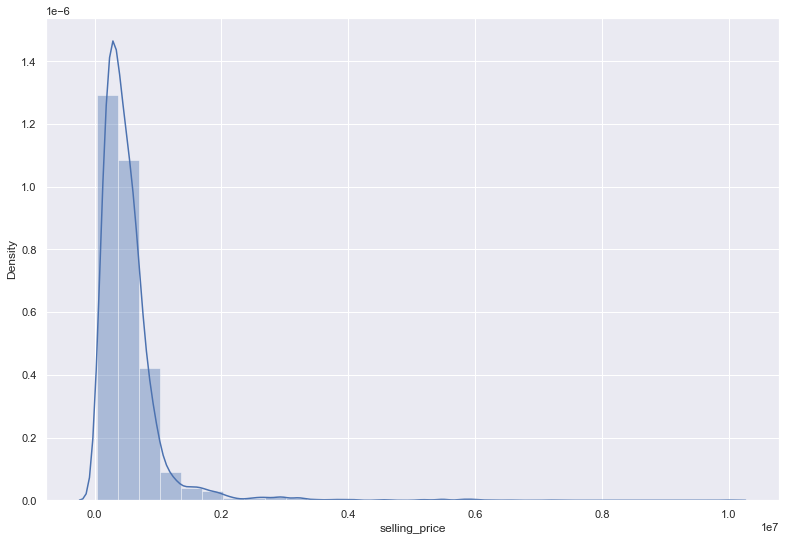

In [69]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['selling_price'], bins=30)
plt.show()

In [70]:
df['selling_price'].median()

420000.0

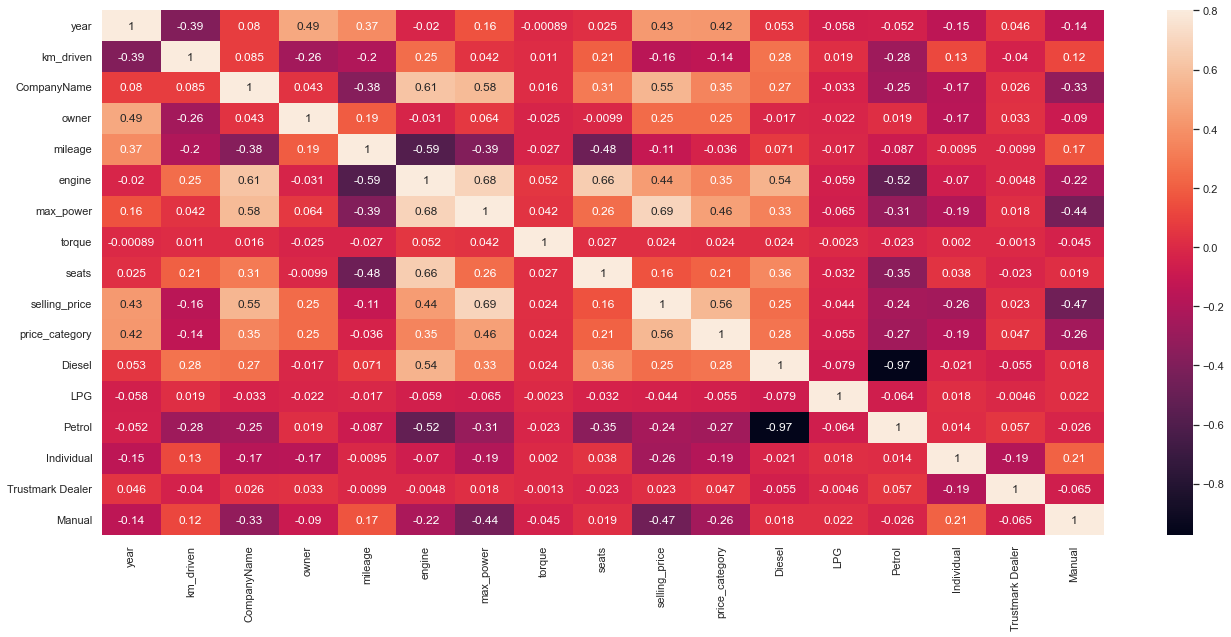

In [71]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

## Model Building

In [72]:
df1=df.drop(columns=['torque','LPG','Trustmark Dealer','Petrol','name'])

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [74]:
x, y=(df1.drop('selling_price',axis = 1), df.selling_price)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4701, 12)
(2016, 12)
(4701,)
(2016,)


In [75]:
x_train

,year,km_driven,CompanyName,owner,mileage,engine,max_power,seats,price_category,Diesel,Individual,Manual
5988,2011,100000,4.0,4,18.30,1991,147.90,5.0,1,1,1,1
1889,2015,60000,12.0,4,19.67,1582,126.20,5.0,4,1,1,1
811,2016,90000,17.0,3,15.96,2523,62.10,7.0,3,1,1,1
3828,2015,70000,8.0,4,17.57,1193,88.70,5.0,1,0,1,1
1272,2014,27233,15.0,4,27.40,1498,98.63,5.0,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4931,2011,70000,9.0,2,17.50,1298,85.80,5.0,1,0,1,1
3264,2011,148000,8.0,3,21.12,1248,88.80,5.0,2,1,1,1
1653,2006,120000,9.0,1,19.70,796,46.30,5.0,2,0,1,1
2607,2018,35000,8.0,3,23.84,1199,84.00,5.0,1,0,1,1


In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


scaler.fit(x_train)




MinMaxScaler()

In [77]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [79]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [80]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [81]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train,y_train)

LinearRegression(normalize=True)

In [82]:
pred = lin_reg.predict(x_test)

In [83]:
test_pred = lin_reg.predict(x_test)
train_pred = lin_reg.predict(x_train)

In [84]:
print('Test set evalation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)

Test set evalation:
MAE: 158640.37386831507
MSE: 99475636582.79002
RMSE: 315397.5849349358
R2 Square 0.6481021081710212
__________________________________
Train set evaluation:
MAE: 159014.25932796946
MSE: 88404382385.21846
RMSE: 297328.7446333073
R2 Square 0.6729433650569837
__________________________________


In [85]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
gradient=GradientBoostingRegressor(random_state=0)
gradient.fit(x_train,y_train)

GradientBoostingRegressor(random_state=0)

In [86]:
test_pred2 = gradient.predict(x_test)
train_pred2 = gradient.predict(x_train)

In [87]:
print('Test set evalation:')
print_evaluate(y_test, test_pred2)
print('Train set evaluation:')
print_evaluate(y_train, train_pred2)

Test set evalation:
MAE: 63785.96879950792
MSE: 16948770768.470049
RMSE: 130187.444742072
R2 Square 0.9400432416679897
__________________________________
Train set evaluation:
MAE: 58705.69280421739
MSE: 9271948449.163914
RMSE: 96290.95725541373
R2 Square 0.965697941919498
__________________________________
